# Elements of Data Science: A First Course 

# COMS W4995 008 2017 3


## Week 6:  Feature Engineering and Natural Language Processing

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

np.random.seed(123)
%matplotlib inline

## Reading: 

## Today

- Feature Engineering
    - dummy variables, one-hot encoding
    - scaling, normalizing
    - imputing

- Natural Language Processing
    - Examples (sentiment analysis, entity extraction, ...)
    - BOW
    - TfIdf
    - Stopwords
    - Stemming and Lemmatization
    - N-Grams
    - Parse Trees

## Feature Engineering

In [2]:
from sklearn.preprocessing import OneHotEncoder, LabelBinarizer

ohe = OneHotEncoder(sparse=False)

In [3]:
X = [[0,0],[1,1],[0,2]]

In [4]:
ohe.fit_transform(X)

array([[ 1.,  0.,  1.,  0.,  0.],
       [ 0.,  1.,  0.,  1.,  0.],
       [ 1.,  0.,  0.,  0.,  1.]])

In [5]:
from sklearn.preprocessing import StandardScaler, RobustScaler

scaler = StandardScaler(with_mean=True,     # substract mean
                        with_std=True)      # scale to unit variance

rscaler = RobustScaler(with_centering=True, # subtract median
                      with_scaling=True)    # scale to IQR

X = np.array([1.,2.,10.]).reshape(-1,1)

In [6]:
scaler.fit_transform(X)

array([[-0.82760589],
       [-0.57932412],
       [ 1.40693001]])

In [7]:
rscaler.fit_transform(X)

array([[-0.22222222],
       [ 0.        ],
       [ 1.77777778]])

In [8]:
from sklearn.preprocessing import Binarizer

binar = Binarizer(threshold=1000.0)

X = np.array([1000.0, 999.0,1001.0]).reshape(-1,1)

In [9]:
binar.fit_transform(X)

array([[ 0.],
       [ 0.],
       [ 1.]])

In [10]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=2,               # degree of polynomial
                          include_bias=True,      # include column of ones
                          interaction_only=False) # exclude terms raised to degree

X = [[1, 2],[2,3]]

In [11]:
poly.fit_transform(X) # x_0, x_1, x_2, x_1**2, x_1*x_2, x_2**2

array([[ 1.,  1.,  2.,  1.,  2.,  4.],
       [ 1.,  2.,  3.,  4.,  6.,  9.]])

In [12]:
from sklearn.preprocessing import FunctionTransformer

In [13]:
from sklearn.preprocessing import Imputer

imputer = Imputer(strategy='mean') # mean, median, most_frequent

X = np.array([1,np.nan,2]).reshape(-1,1)

In [14]:
imputer.fit_transform(X)

array([[ 1. ],
       [ 1.5],
       [ 2. ]])

In [15]:
from sklearn.pipeline import Pipeline, FeatureUnion

In [16]:
from sklearn.pipeline import make_union, make_pipeline

In [17]:
def get_categorical_cols(X):
    categorical_col_idxs = []
    return X[:,categorical_col_idxs]

In [18]:
def get_real_cols(X):
    real_col_idxs = []
    return X[:,real_col_idxs]

In [19]:
vec = make_union(make_pipeline(FunctionTransformer(get_categorical_cols, validate=False), 
                                OneHotEncoder()),
                  make_pipeline(FunctionTransformer(get_real_cols, validate=False), 
                                StandardScaler())
                )

## Natural Language Processing

### Example Tasks

- sentiment analysis

- entity recognition

- machine translation

- natural language generation

- question answering

- relationship extraction

- automatic summarization

- ...

### Documents

- tweets
- reviews
- resumes
- books
- articles
- ...

**corpus**: a collection of documents

### How do we represent a document?

**terms**: the distinct values in our vocabulary ('aardvark','are','animal',...)

**tokens**: the strings that make up a document ('These','are','tokens','.')

**tokenization**: transforming a document into tokens.

### Bag of Words Representation

- split document into tokens
- ignoring order

**Term Frequency**: number of occurance of a term in a document

**Document Frequency**: number of documents a term occurs in

In [20]:
from sklearn.feature_extraction.text import CountVectorizer

In [21]:
cv = CountVectorizer()
cv

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words=None,
        strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
        tokenizer=None, vocabulary=None)

### Tf-Idf Representation

- term frequency - inverse document frequency
- downweight terms seen in many documents

In [22]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [23]:
tfidf = TfidfVectorizer()
tfidf

TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), norm='l2', preprocessor=None, smooth_idf=True,
        stop_words=None, strip_accents=None, sublinear_tf=False,
        token_pattern='(?u)\\b\\w\\w+\\b', tokenizer=None, use_idf=True,
        vocabulary=None)

**Stopwords**: uninformative terms we know we want to exclude (a, and, the, ...)

In [24]:
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS

list(ENGLISH_STOP_WORDS)[:10]

['latterly',
 'until',
 'below',
 'amongst',
 'per',
 'eleven',
 'third',
 'enough',
 'may',
 'myself']

### Stemming/Lemmatization

### How do we capture context?

**n_grams**: combinations of colocated terms

**parse trees**: grammatical mapping of a sentence

**word2vec**: encode terms by their neighbors

In [25]:
sample_tweets_file = '../data/sample_tweets.txt'

if 0 == 1:
    with open('/home/bgibson/Downloads/twitter_consumer_key.txt') as f:
        consumer_key = f.read().strip()
    with open('/home/bgibson/Downloads/twitter_consumer_secret.txt') as f:
        consumer_secret = f.read().strip()
    with open('/home/bgibson/Downloads/twitter_access_token.txt') as f:
        access_token = f.read().strip()
    with open('/home/bgibson/Downloads/twitter_access_token_secret.txt') as f:
        access_token_secret = f.read().strip()

    import tweepy
    
    auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
    auth.set_access_token(access_token, access_token_secret)

    api = tweepy.API(auth)

    public_tweets = api.search(['columbia'],count=100)
    tweets = [tweet.text for tweet in public_tweets]
    print(len(tweets))
    with open(sample_tweets_file,'w') as f:
        for tweet in tweets:
            
            f.write(tweet.replace('\n',' '),'\n')
else:
    with open(sample_tweets_file) as f:
        tweets = f.readlines()
    tweets = [tweet.replace('\n','') for tweet in tweets]

In [26]:
tweets

['@CombMyAfro @ussoccer_ynt But Ghana clearly wins the group on goal difference. Columbia 2nd, US 3rd. Rankings are n… https://t.co/joR7g4KJN3',
 'RT @Schwartzie14: Another great piece on @Columbia football by @henryschwartz7 https://t.co/OKQYQ44HOq',
 "RT @Far_Right_Watch: So Racist Thug Tommy Robinson did a 'Speech' at a NY University (by Skype) and it DID NOT go well :-)  https://t.co/Qu…",
 '"Hail, Columbia" was written for George Washington\'s inauguration and is basically, "Hell yeah, we won the Revolutionary War!"',
 'RT @NYTMetro: A ceremony at Columbia honored Kim Wall, an alumna whose death in August has shaken the journalism community. https://t.co/eO…',
 'Key Leader: Lululemon Athletica (Kelowna BC): "Kelowna , British Columbia , Canada Job Family G.. #retail #eluta https://t.co/1d4XoMGIS0',
 'RT @uaf: Protesters stopped a speech at #Columbia University by fascist Tommy Robinson @uaf Good on them! https://t.co/xIzjWTvZmG',
 'RT @kremlincardinal: 16/10 would let these best d

In [27]:
tweets[0].lower().split()

['@combmyafro',
 '@ussoccer_ynt',
 'but',
 'ghana',
 'clearly',
 'wins',
 'the',
 'group',
 'on',
 'goal',
 'difference.',
 'columbia',
 '2nd,',
 'us',
 '3rd.',
 'rankings',
 'are',
 'n…',
 'https://t.co/jor7g4kjn3']

In [28]:
from collections import Counter

In [29]:
term_counts = Counter()
for t in tweets:
    for x in t.lower().split():
        term_counts[x] += 1

In [30]:
term_counts.most_common(10)

[('the', 46),
 ('rt', 36),
 ('columbia', 35),
 ('a', 30),
 ('and', 24),
 ('to', 24),
 ('on', 18),
 ('of', 18),
 ('in', 16),
 ('did', 15)]

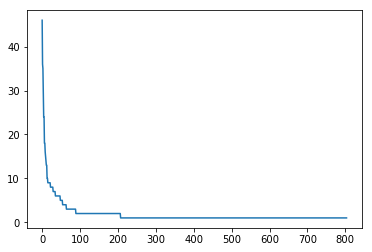

In [31]:
plt.plot([x[1] for x in term_counts.most_common()])

In [32]:
cv = CountVectorizer(ngram_range=(1,2))
X = cv.fit_transform(tweets)

In [33]:
cv.get_feature_names()

['00',
 '00 https',
 '000',
 '000 miles',
 '10',
 '10 17',
 '10 18',
 '10 for',
 '10 weeks',
 '10 would',
 '11660',
 '11660 rt',
 '117784',
 '117784 https',
 '12407',
 '12407 mls',
 '16',
 '16 10',
 '17',
 '17 at',
 '17 hear',
 '17 world',
 '18',
 '18 https',
 '18 join',
 '18 liongains',
 '18 show',
 '1971',
 '1971 jack',
 '1998',
 '1998 mercury',
 '1d4xomgis0',
 '1ubtv0fcrk',
 '20',
 '20 years',
 '202',
 '202 pine',
 '23',
 '23 ashland',
 '26',
 '26 months',
 '2768',
 '2768 decker',
 '28',
 '28 stay',
 '2nd',
 '2nd on',
 '2nd us',
 '2sbmake0bw',
 '2xhnafccgn',
 '2xhnafccgn available',
 '33mypazljj',
 '38',
 '38 organizations',
 '3ldf8kbns2',
 '3rd',
 '3rd placed',
 '3rd rankings',
 '3rmowlun12',
 '3rmowlun12 https',
 '3tnvaw9sgl',
 '46',
 '46 years',
 '4a5hh8l3cr',
 '4a5hh8l3cr shutte',
 '55',
 '55 columbia',
 '66',
 '66 000',
 '6f3z5sejmz',
 '6pm',
 '6pm mvb',
 '800',
 '800 https',
 '8pm',
 '8pm https',
 '9lgoini7ey',
 '9s',
 '9s are',
 '9uzzg1yfbr',
 'abeoelqouz',
 'accommodations',

In [34]:
cv = CountVectorizer(ngram_range=(1,2), min_df=2, stop_words='english')
X = cv.fit_transform(tweets)
cv.get_feature_names()

['10',
 '10 18',
 '10 let',
 '10 weeks',
 '16',
 '16 10',
 '17',
 '18',
 '18 join',
 '2nd',
 '2xhnafccgn',
 '2xhnafccgn available',
 '3rd',
 '9s',
 '9s expected',
 'actually',
 'advance',
 'amazing',
 'amdoubt',
 'amdoubt spoonhead8',
 'amp',
 'amp online',
 'athletica',
 'athletica kelowna',
 'available',
 'available locally',
 'bc',
 'bc kelowna',
 'beat',
 'best',
 'best doggos',
 'bobrae48',
 'bobrae48 game',
 'bombard',
 'bombard british',
 'bridge',
 'bridge gods',
 'british',
 'british columbia',
 'burn',
 'canada',
 'canada job',
 'car',
 'car perfectly',
 'changer',
 'changer https',
 'cmnvvkpytp',
 'colombia',
 'columbia',
 'columbia 2nd',
 'columbia canada',
 'columbia football',
 'columbia https',
 'columbia missouri',
 'columbia northwestern',
 'columbia photo',
 'columbia river',
 'columbia sc',
 'columbia trobinsonnewera',
 'columbiagivingday',
 'combmyafro',
 'combmyafro ussoccer_ynt',
 'contemplative',
 'contemplative practices',
 'deep',
 'deep learning',
 'did',
 'di

In [35]:
tweets[0]

'@CombMyAfro @ussoccer_ynt But Ghana clearly wins the group on goal difference. Columbia 2nd, US 3rd. Rankings are n… https://t.co/joR7g4KJN3'

In [36]:
print(X[0])

  (0, 49)	1
  (0, 96)	1
  (0, 243)	1
  (0, 61)	1
  (0, 118)	1
  (0, 12)	1
  (0, 9)	1
  (0, 48)	1
  (0, 69)	1
  (0, 95)	1
  (0, 104)	1
  (0, 94)	1
  (0, 242)	1
  (0, 60)	1


In [37]:
cv.get_feature_names()[118]

'https'

In [38]:
tfidf = TfidfVectorizer(ngram_range=(1,2), min_df=2, stop_words='english')
X = tfidf.fit_transform(tweets)

In [39]:
print(X[0])

  (0, 60)	0.276815064174
  (0, 242)	0.276815064174
  (0, 94)	0.295646467598
  (0, 104)	0.276815064174
  (0, 95)	0.276815064174
  (0, 69)	0.295646467598
  (0, 48)	0.0963548337156
  (0, 9)	0.276815064174
  (0, 12)	0.295646467598
  (0, 118)	0.0807171894884
  (0, 61)	0.276815064174
  (0, 243)	0.295646467598
  (0, 96)	0.295646467598
  (0, 49)	0.295646467598


In [40]:
import spacy

In [41]:
nlp = spacy.load('en')

In [42]:
doc = nlp(tweets[0])
dochttp://localhost:8888/tree

@CombMyAfro @ussoccer_ynt But Ghana clearly wins the group on goal difference. Columbia 2nd, US 3rd. Rankings are n… https://t.co/joR7g4KJN3

In [43]:
pd.DataFrame([(w.text,w.pos_) for w in doc],
             columns=['token','pos'])

,token,pos
0,@CombMyAfro,NOUN
1,@ussoccer_ynt,PROPN
2,But,CCONJ
3,Ghana,PROPN
4,clearly,ADV
5,wins,VERB
6,the,DET
7,group,NOUN
8,on,ADP
9,goal,NOUN


In [44]:
pd.DataFrame([(w.text,w.lemma_) for w in doc],
             columns=['token','lemma'])

,token,lemma
0,@CombMyAfro,@combmyafro
1,@ussoccer_ynt,@ussoccer_ynt
2,But,but
3,Ghana,ghana
4,clearly,clearly
5,wins,win
6,the,the
7,group,group
8,on,on
9,goal,goal


In [45]:
[ent for ent in doc.ents]

[Ghana, Columbia, US]

https://demos.explosion.ai/displacy/

In [46]:
tweets[0]

'@CombMyAfro @ussoccer_ynt But Ghana clearly wins the group on goal difference. Columbia 2nd, US 3rd. Rankings are n… https://t.co/joR7g4KJN3'

In [48]:
cv = CountVectorizer()
X = cv.fit_transform(['this is a test.',
                      'Here is a sentence.',
                      'This is two sentences. Yes it is.'])

In [49]:
X[0]

<1x9 sparse matrix of type '<class 'numpy.int64'>'
	with 3 stored elements in Compressed Sparse Row format>

In [50]:
cv.get_feature_names()

['here', 'is', 'it', 'sentence', 'sentences', 'test', 'this', 'two', 'yes']